# **Sales Pipeline analysis using Machine Learning Algorithm**

The aim of this project is to develop and implement efficient machine learning models
using the sales pipeline dataset. We will feed historical data into various
Regression algorithms, training them to identify patterns. Our focus will be on evaluating and comparing the performance of these models
during both the training and testing phases.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('sales_pipeline.csv')

In [3]:
dataset

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


# **Preprocessing the dataset**

In [4]:
dataset.shape

(8800, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [6]:
dataset.isnull().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
cat_imputer=SimpleImputer(strategy='most_frequent')
num_imputer=SimpleImputer(strategy='mean')

In [9]:
categorical_cols = ['account', 'engage_date', 'close_date']
numerical_cols = ['close_value']

In [10]:
dataset[categorical_cols]=cat_imputer.fit_transform(dataset[categorical_cols])
dataset[numerical_cols]=num_imputer.fit_transform(dataset[numerical_cols])

In [11]:
dataset.isnull().sum()

opportunity_id    0
sales_agent       0
product           0
account           0
deal_stage        0
engage_date       0
close_date        0
close_value       0
dtype: int64

Text(0.5, 0.98, 'Distribution of Close Values')

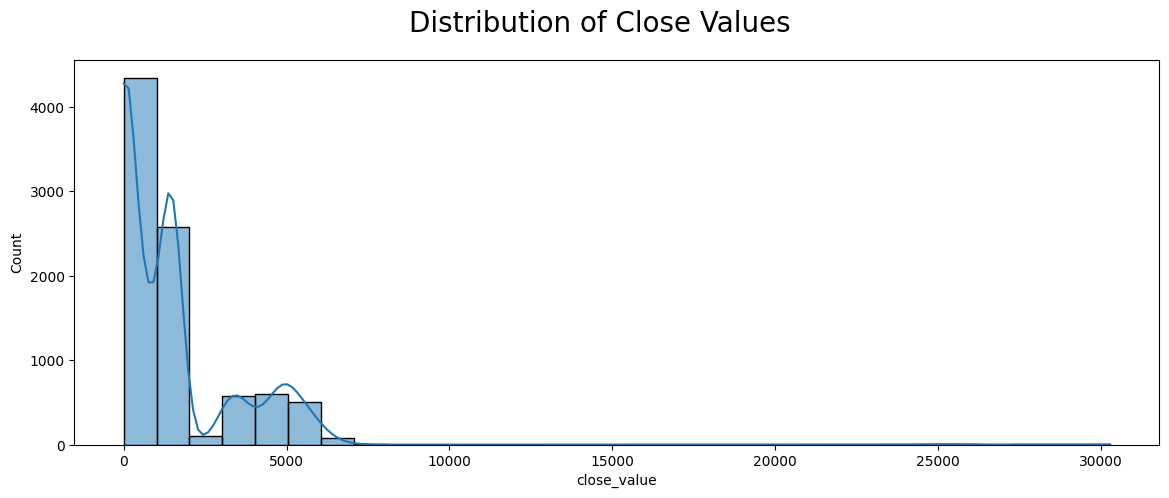

In [12]:
plt.figure(figsize=(14, 5))
sns.histplot(dataset['close_value'], bins=30, kde=True)
plt.suptitle('Distribution of Close Values',fontsize=20)

Text(0.5, 0.98, 'Count of Opportunities by Deal Stage')

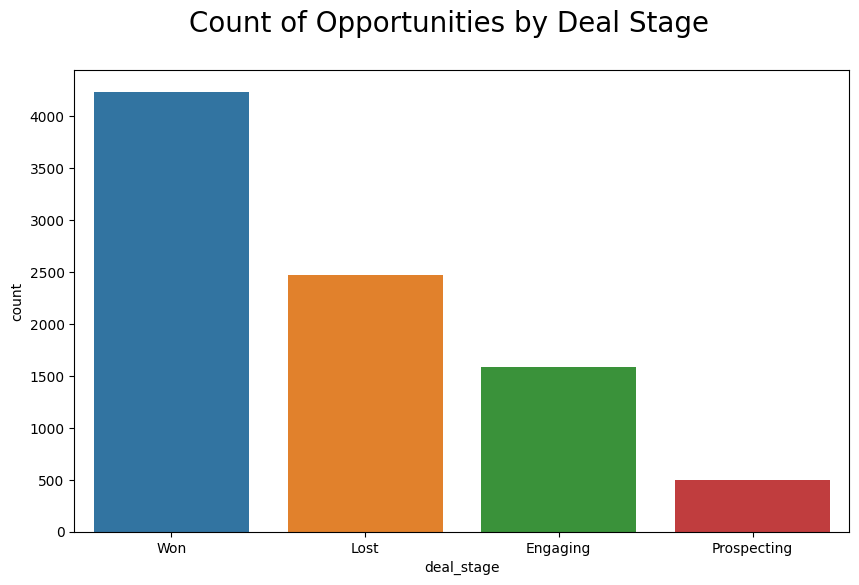

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='deal_stage', order=dataset['deal_stage'].value_counts().index)
plt.suptitle('Count of Opportunities by Deal Stage',fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'GTX Plus Basic'),
  Text(1, 0, 'GTXPro'),
  Text(2, 0, 'MG Special'),
  Text(3, 0, 'GTX Basic'),
  Text(4, 0, 'MG Advanced'),
  Text(5, 0, 'GTX Plus Pro'),
  Text(6, 0, 'GTK 500')])

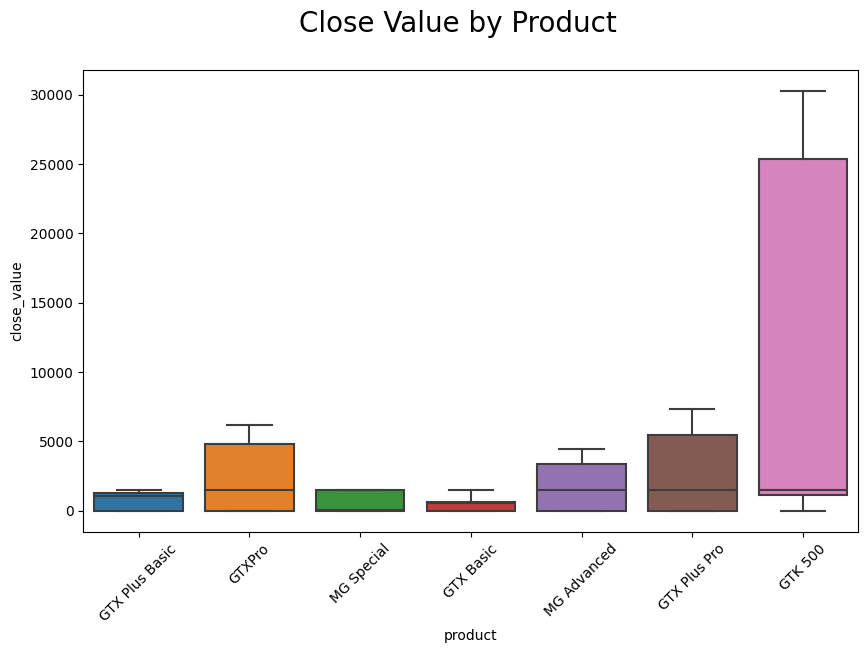

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='product', y='close_value')
plt.suptitle("Close Value by Product",fontsize=20)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Won'),
  Text(1, 0, 'Engaging'),
  Text(2, 0, 'Lost'),
  Text(3, 0, 'Prospecting')])

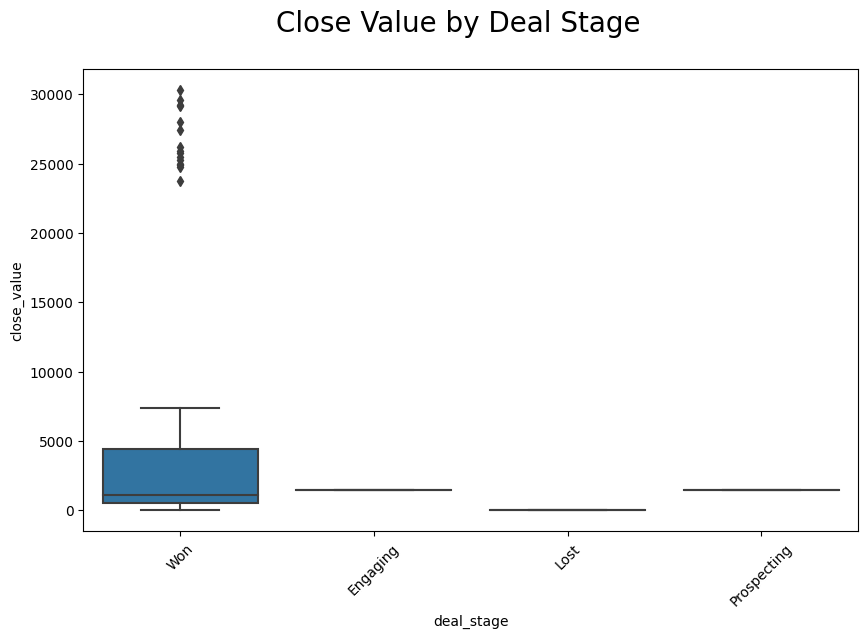

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='deal_stage', y='close_value')
plt.suptitle("Close Value by Deal Stage",fontsize=20)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Moses Frase'),
  Text(1, 0, 'Darcel Schlecht'),
  Text(2, 0, 'Zane Levy'),
  Text(3, 0, 'Anna Snelling'),
  Text(4, 0, 'Vicki Laflamme'),
  Text(5, 0, 'Markita Hansen'),
  Text(6, 0, 'Niesha Huffines'),
  Text(7, 0, 'James Ascencio'),
  Text(8, 0, 'Gladys Colclough'),
  Text(9, 0, 'Maureen Marcano'),
  Text(10, 0, 'Hayden Neloms'),
  Text(11, 0, 'Rosalina Dieter'),
  Text(12, 0, 'Versie Hillebrand'),
  Text(13, 0, 'Daniell Hammack'),
  Text(14, 0, 'Elease Gluck'),
  Text(15, 0, 'Violet Mclelland'),
  Text(16, 0, 'Kami Bicknell'),
  Text(17, 0, 'Rosie Papadopoulos'),
  Text(18, 0, 'Kary Hendrixson'),
  Text(19, 0, 'Reed Clapper'),
  Text(20, 0, 'Wilburn Farren'),
  Text(21, 0, 'Garret Kinder'),
  Text(22, 0, 'Marty Freudenburg'),
  Text(23, 0, 'Cassey Cress'),
  Text(24, 0, 'Lajuana Vencill'),
  Text(25, 0, 'Boris Faz'),
  Text(26, 0, 'D

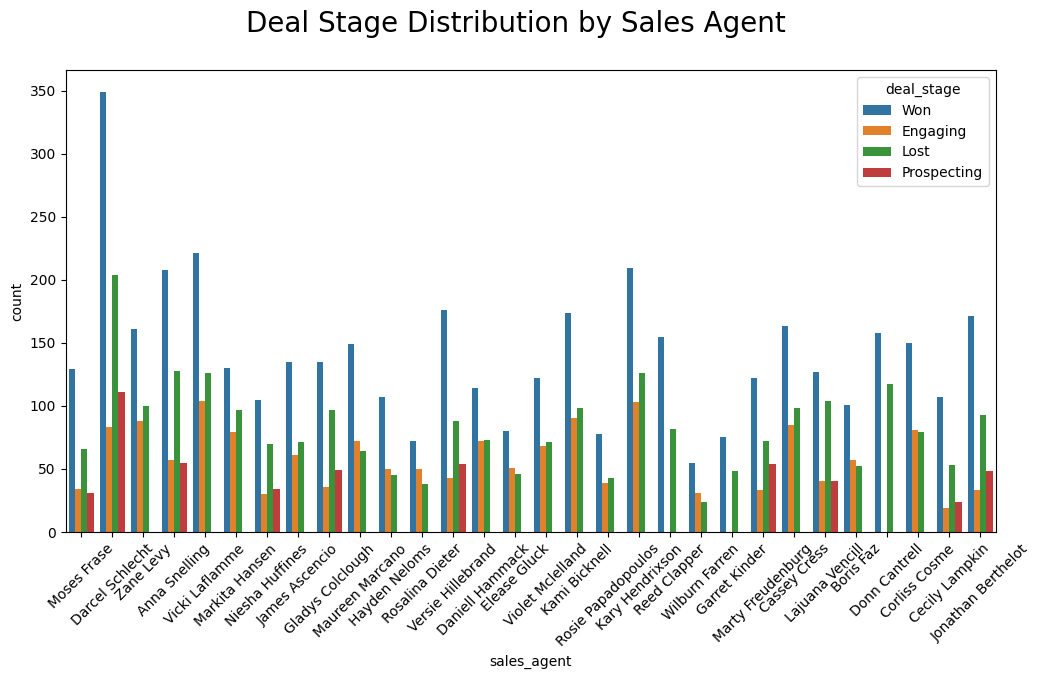

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='sales_agent', hue='deal_stage')
plt.suptitle("Deal Stage Distribution by Sales Agent",fontsize=20)
plt.xticks(rotation=45)

# OUTLIERS

Text(0.5, 1.0, 'Box Plot for Close Value')

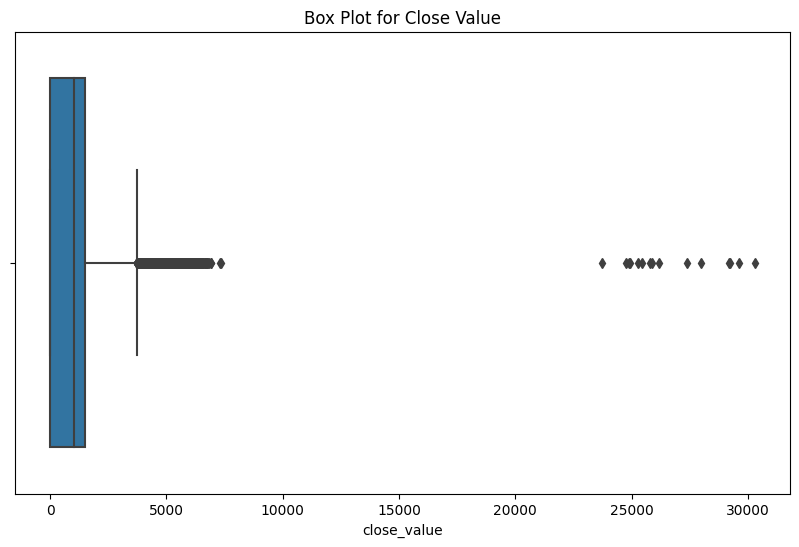

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['close_value'])
plt.title('Box Plot for Close Value')

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [22]:
label=LabelEncoder()
scale=StandardScaler()

In [23]:
dataset['sales_agent']=label.fit_transform(dataset['sales_agent'])
dataset['product']=label.fit_transform(dataset['product'])
dataset['account']=label.fit_transform(dataset['account'])
dataset['deal_stage']=label.fit_transform(dataset['deal_stage'])
dataset['engage_date']=label.fit_transform(dataset['engage_date'])
dataset['close_date']=label.fit_transform(dataset['close_date'])
dataset['close_value']=scale.fit_transform(dataset['close_value'].values.reshape(-1,1))

# **Splitting the dataset**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=dataset[['sales_agent','product','account','deal_stage','engage_date','close_date']]
y=dataset['close_value']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **Importing the machine learning model and fitting the dataset**

In [27]:
#Importing the machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [28]:
model_1=LinearRegression()

In [29]:
model_1.fit(x_train,y_train)

LinearRegression()

In [30]:
model_1.score(x_train,y_train)

0.13000953922269587

In [31]:
y_pred_1=model_1.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,median_absolute_error

In [33]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_1))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_1))
print('R2_score',r2_score(y_test,y_pred_1))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_1))

Mean_Squared_error 0.856869773292124
Mean_Absolute_error 0.6933528921070228
R2_score 0.13827650163192884
Median_absolute_error 0.5488406234967109


In [34]:
model_2=DecisionTreeRegressor()

In [35]:
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
model_2.score(x_train,y_train)

1.0

In [37]:
y_pred_2=model_2.predict(x_test)

In [38]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_2))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_2))
print('R2_score',r2_score(y_test,y_pred_2))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_2))

Mean_Squared_error 0.02714302789108725
Mean_Absolute_error 0.0679238730755926
R2_score 0.972703220863136
Median_absolute_error 1.27675647831893e-14


In [39]:
model_3=SVR()

In [40]:
model_3.fit(x_train,y_train)

SVR()

In [41]:
model_3.score(x_train,y_train)

-0.148623747117818

In [42]:
y_pred_3=model_3.predict(x_test)

In [43]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_3))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_3))
print('R2_score',r2_score(y_test,y_pred_3))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_3))

Mean_Squared_error 1.1608397038808214
Mean_Absolute_error 0.5838360956523919
R2_score -0.16741526174912358
Median_absolute_error 0.22949004806515855


In [44]:
model_4=RandomForestRegressor()

In [45]:
model_4.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
model_4.score(x_train,y_train)

0.9978602916366028

In [47]:
y_pred_4=model_4.predict(x_test)

In [48]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_4))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_4))
print('R2_score',r2_score(y_test,y_pred_4))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_4))

Mean_Squared_error 0.014121757198100333
Mean_Absolute_error 0.04679527525181332
R2_score 0.98579825033494
Median_absolute_error 3.3306690738754696e-16


In [49]:
model_5=KNeighborsRegressor()

In [50]:
model_5.fit(x_train,y_train)

KNeighborsRegressor()

In [51]:
model_5.score(x_train,y_train)

0.2377158149752039

In [52]:
y_pred_5=model_5.predict(x_test)

In [53]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_5))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_5))
print('R2_score',r2_score(y_test,y_pred_5))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_5))

Mean_Squared_error 1.150073812097103
Mean_Absolute_error 0.6803182177527435
R2_score -0.15658838674421527
Median_absolute_error 0.5038889323416031


In [54]:
model_6=GradientBoostingRegressor()

In [55]:
model_6.fit(x_train,y_train)

GradientBoostingRegressor()

In [56]:
model_6.score(x_train,y_train)

0.9871321868053541

In [57]:
y_pred_6=model_6.predict(x_test)

In [58]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_6))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_6))
print('R2_score',r2_score(y_test,y_pred_6))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_6))

Mean_Squared_error 0.014683041243194523
Mean_Absolute_error 0.06102831594270499
R2_score 0.9852337869053823
Median_absolute_error 0.024015739932994273


In [59]:
model_7=XGBRegressor()

In [60]:
model_7.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [61]:
model_7.score(x_train,y_train)

0.9962310975025729

In [62]:
y_pred_7=model_7.predict(x_test)

In [63]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_7))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_7))
print('R2_score',r2_score(y_test,y_pred_7))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_7))

Mean_Squared_error 0.015137080376600878
Mean_Absolute_error 0.05920525518356757
R2_score 0.9847771758745932
Median_absolute_error 0.018695047573947743


# **Visualizing the training performance**

In [64]:
#Let's enter the model name and the performance detail's
model_name=['Linear_regression','Decision_tree_Regressor','SVR','Random_forest_Regressor','KNN','Gradient_boost','XGBoost']
model_train_performance=[model_1.score(x_train,y_train),model_2.score(x_train,y_train),model_3.score(x_train,y_train),model_4.score(x_train,y_train),model_5.score(x_train,y_train),model_6.score(x_train,y_train),model_7.score(x_train,y_train)]

In [65]:
print('The Training score of Linear Regression is:',model_1.score(x_train,y_train))
print('The Training score of Decision Tree is:',model_2.score(x_train,y_train))
print('The Training score of Random Forest is:',model_3.score(x_train,y_train))
print('The Training score of KNN is:',model_4.score(x_train,y_train))
print('The Training score of SVM is:',model_5.score(x_train,y_train))
print('The Training score of GradientBoost is:',model_6.score(x_train,y_train))
print('The Training score of XGBoost is:',model_7.score(x_train,y_train))

The Training score of Linear Regression is: 0.13000953922269587
The Training score of Decision Tree is: 1.0
The Training score of Random Forest is: -0.148623747117818
The Training score of KNN is: 0.9978602916366028
The Training score of SVM is: 0.2377158149752039
The Training score of GradientBoost is: 0.9871321868053541
The Training score of XGBoost is: 0.9962310975025729


Text(0.5, 0.98, 'Training Score Of Each Model')

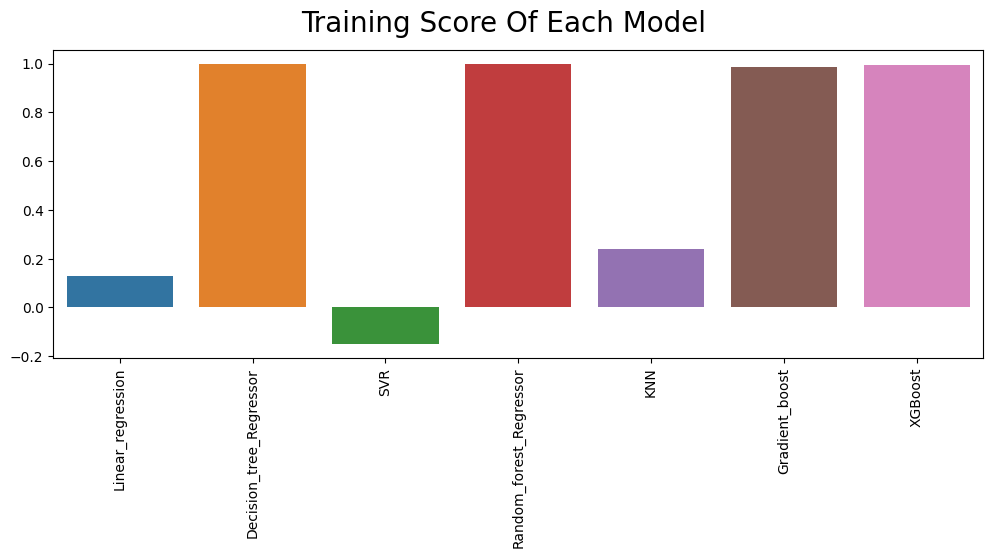

In [66]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_train_performance)
plt.xticks(rotation=90)
plt.suptitle('Training Score Of Each Model',fontsize=20)

# **Testing performance of each model**

In [67]:
model_test_performance=[r2_score(y_test,y_pred_1),r2_score(y_test,y_pred_2),r2_score(y_test,y_pred_3),r2_score(y_test,y_pred_4),r2_score(y_test,y_pred_5),r2_score(y_test,y_pred_6),r2_score(y_test,y_pred_7)]

In [68]:
print('The Testing score of Linear Regression is:',r2_score(y_test,y_pred_1))
print('The Testing score of Decision Tree is:',r2_score(y_test,y_pred_2))
print('The Testing score of SVM is:',r2_score(y_test,y_pred_3))
print('The Testing score of Random Forest is:',r2_score(y_test,y_pred_4))
print('The Testing score of KNN is:',r2_score(y_test,y_pred_5))
print('The Testing score of GradientBoost is:',r2_score(y_test,y_pred_6))
print('The Testing score of XGBoost is:',r2_score(y_test,y_pred_7))

The Testing score of Linear Regression is: 0.13827650163192884
The Testing score of Decision Tree is: 0.972703220863136
The Testing score of SVM is: -0.16741526174912358
The Testing score of Random Forest is: 0.98579825033494
The Testing score of KNN is: -0.15658838674421527
The Testing score of GradientBoost is: 0.9852337869053823
The Testing score of XGBoost is: 0.9847771758745932


Text(0.5, 0.98, 'Testing Score Of Each Model')

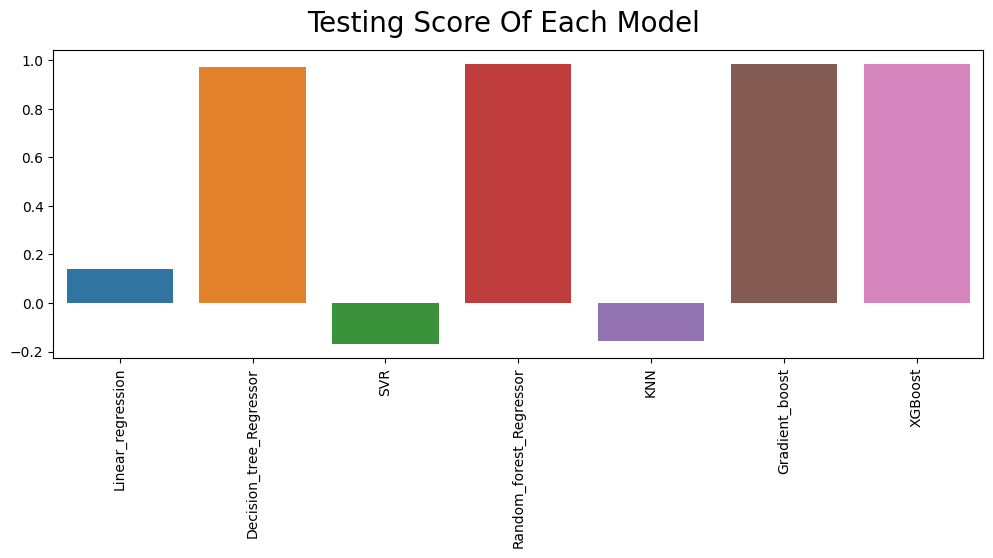

In [69]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_test_performance)
plt.xticks(rotation=90)
plt.suptitle('Testing Score Of Each Model',fontsize=20)